In [ ]:
#Market basket Analysis

In [192]:
pip install pandas mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 445.2 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.4 MB 409.6 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.4 MB 359.3 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.4 MB 359.3 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.4 MB 359.3 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.4 MB 309.1 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.4 MB 295.4 kB/s eta 0:00:05
   --- ------------------------------------ 0.1/1.4 MB 300.4 kB/s eta 0:00:05
   --- ------------------------------------ 0.1/1.4 MB 316.2 kB/s eta 0:00:05
   ---- ----------------------------------- 0.2/1.4 MB 306.3 kB/s eta 0:00:05
   ---- -----

In [194]:
#Libries used
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
#market basket Analysis

In [204]:
# Load the dataset
retail_data = pd.read_csv("data\Online Retail.csv")


In [206]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


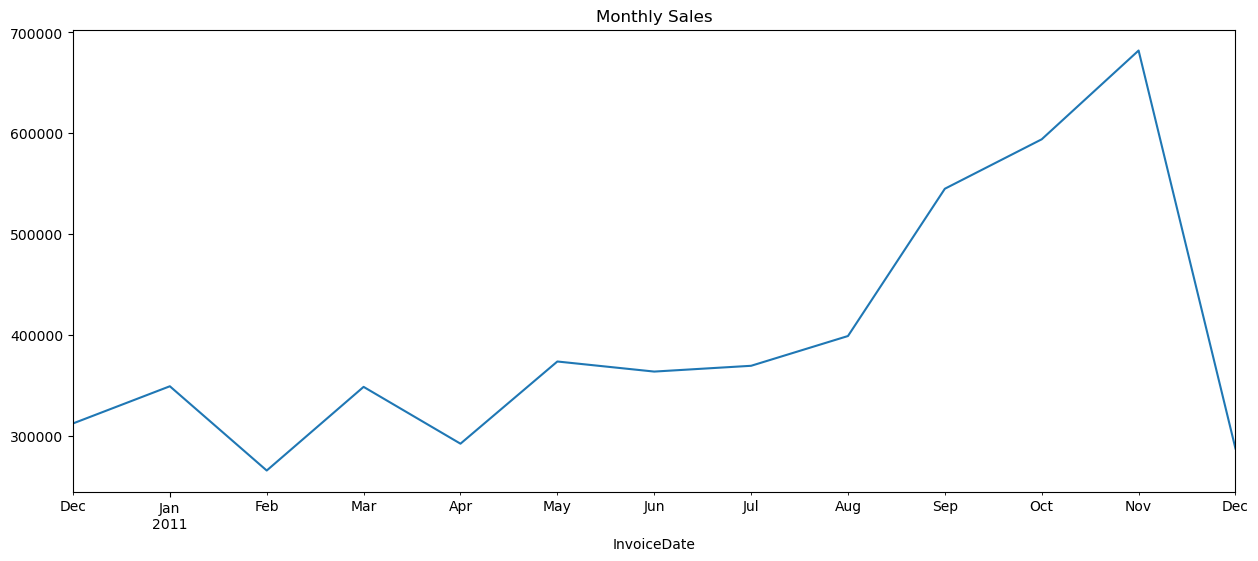

In [228]:
# Remove rows with missing values
retail_data.dropna(inplace=True)
# Remove rows where Quantity is less than or equal to 0
retail_data = retail_data[retail_data['Quantity'] > 0]
# Distribution of the transactions
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])
retail_data.set_index('InvoiceDate', inplace=True)
retail_data['Quantity'].resample('M').sum().plot(kind='line', figsize=(15, 6), title='Monthly Sales')
plt.show()

In [218]:
#remove rows with missing values
retail_data.dropna(inplace=True)
#Remove rows where Quantity is less than or equal to 0
retail_data=retail_data[retail_data['Quantity']>0]
#Distribution of transactions
retail_data['InvoiceDate']=pd.to_datetime(retail_data['InvoiceDate'],dayfirst=True)
retail_data.set_index('InvoiceDate',inplace=True)
retail_data['Quantity'].resameple('M').sum().plot(kind='line',figsize=(15,6),title='Monthly Sales')
plt.show()

C:\Users\ashis\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\ashis\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
C:\Users\ashis\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\ashis\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


KeyError: 'InvoiceDate'

In [224]:
# Check if 'InvoiceDate' column exists before proceeding
if 'InvoiceDate' in retail_data.columns:
    # Remove rows with missing values
    retail_data.dropna(inplace=True)
    # Remove rows where Quantity is less than or equal to 0
    retail_data = retail_data[retail_data['Quantity'] > 0]
    # Convert 'InvoiceDate' to datetime format
    retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'], dayfirst=True)
    # Set 'InvoiceDate' as the index
    retail_data.set_index('InvoiceDate', inplace=True)
    # Plot the distribution of transactions
    retail_data['Quantity'].resample('M').sum().plot(kind='line', figsize=(15, 6), title='Monthly Sales')
    plt.show()
else:
    print("Error: 'InvoiceDate' column not found in the DataFrame.")

Error: 'InvoiceDate' column not found in the DataFrame.


In [230]:
#Basket Creation:


In [236]:
#Creat the basket matrix
basket=(retail_data.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
#Convert quantities to binary values(1 or 0)
basket=basket.applymap(lambda x:1 if x>0 else 0)
#Filter basket for France to make it manageable
basket_fr=basket.loc[retail_data[retail_data['Country']=='France']['InvoiceNo'].unique()]
                                                                                                                     

In [238]:
#Apriori Algorithm:

In [242]:
# Apply the Apriori algorithm
frequent_itemsets= apriori(basket_fr,min_support=0.01,use_colnames=True)
#generate association rules
rules = association_rules(frequent_itemsets,metric="lift",min_threshold=1)
print(rules.head())

C:\Users\ashis\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                         antecedents                        consequents  \
0               ( DOLLY GIRL BEAKER)  (CHARLOTTE BAG DOLLY GIRL DESIGN)   
1  (CHARLOTTE BAG DOLLY GIRL DESIGN)               ( DOLLY GIRL BEAKER)   
2               ( DOLLY GIRL BEAKER)        (DOLLY GIRL CHILDRENS BOWL)   
3        (DOLLY GIRL CHILDRENS BOWL)               ( DOLLY GIRL BEAKER)   
4               ( DOLLY GIRL BEAKER)         (DOLLY GIRL CHILDRENS CUP)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.023136            0.066838  0.012853    0.555556   8.311966   
1            0.066838            0.023136  0.012853    0.192308   8.311966   
2            0.023136            0.046272  0.017995    0.777778  16.808642   
3            0.046272            0.023136  0.017995    0.388889  16.808642   
4            0.023136            0.041131  0.015424    0.666667  16.208333   

   leverage  conviction  zhangs_metric  
0  0.011307    2.099614       0.900526 

In [ ]:
# Plot the rules
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, legend=False, sizes=(20, 2000))
plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

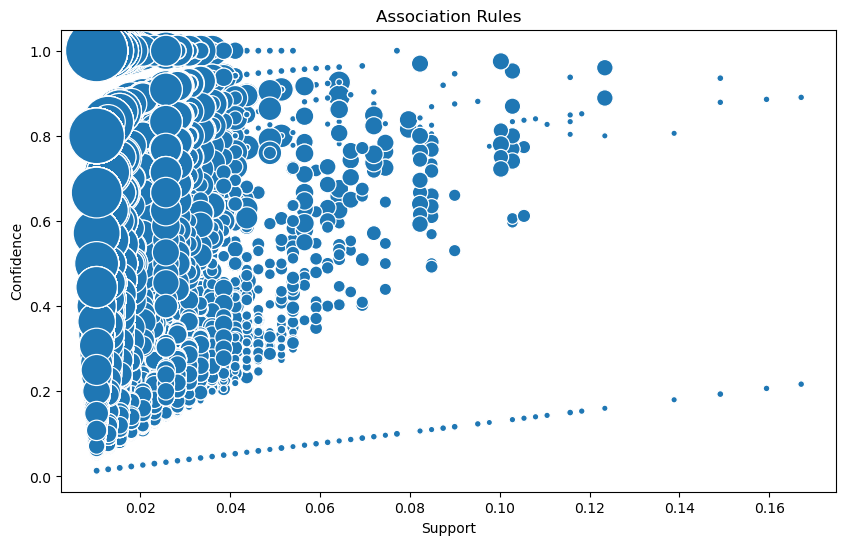

In [244]:
#plot the rules
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x='support',y='confidence',size='lift',data=rules,legend=False,sizes=(20,2000))
plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()